Data comes from Pensylvania's [Department of Environmental Protection](https://www.dep.pa.gov/DataandTools/Reports/Oil%20and%20Gas%20Reports/pages/default.aspx), specifically their [permits issued database](http://cedatareporting.pa.gov/Reportserver/Pages/ReportViewer.aspx?/Public/DEP/OG/SSRS/Permits_Issued_Detail) for a request from 1969 to 11/23/2021.

# Reading in and cleaning

## Read in the permits database

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
df = pd.read_csv('Permits_Issued_Detail.csv')

/Users/tanazmeghjani/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Make sure you can see all of the columns!

I didn't remove extra ones for you this time! It's a trick that involves `pd.set_option`.

In [2]:
df.head()

,REGION,COUNTY,MUNICIPALITY,PERMIT_ISSUED_DATE,OPERATOR,APPLICATION_TYPE,AUTH_TYPE_DESCRIPTION,WELL_API,UNCONVENTIONAL,CONFIGURATION,WELL_TYPE,FARM_NAME,SPUD_DATE,LATITUDE_DEGREES,LONGITUDE_DEGREES,LATITUDE_DECIMAL,LONGITUDE_DECIMAL,OGO_NUM,OPERATOR_ADDRESS,CITY,STATE,ZIP_CODE,AUTHORIZATION_ID,CLIENT_ID,PRMRY_FAC_ID
0,EP DOGO SWDO Dstr Off,Allegheny,Aleppo Twp,2011-03-29,AMER NATURAL RESOURCES LLC,NEW,Drill & Operate Well Permit,003-22174,No,Vertical Well,OIL,MERLE MINICK UNIT 2,04/04/2011,40º 31' 42.97'',-80º 7' 18.74'',40.528603,-80.121872,OGO-38150,PO BOX 306\n520 W PARKWOOD DR\n,RURAL VALLEY,PA,16249-0306,868846,233217,739460
1,EP DOGO SWDO Dstr Off,Allegheny,Aleppo Twp,2011-04-04,AMER NATURAL RESOURCES LLC,NEW,Drill & Operate Well Permit,003-22175,No,Vertical Well,OIL,MERLE MINICK UNIT 1,04/11/2011,40º 32' 0.71'',-80º 7' 22.28'',40.533531,-80.122856,OGO-38150,PO BOX 306\n520 W PARKWOOD DR\n,RURAL VALLEY,PA,16249-0306,869305,233217,739552
2,EP DOGO SWDO Dstr Off,Allegheny,Avalon Boro,1986-09-05,UNKNOWN OPR,NEW,Drill & Operate Well Permit,003-21196,No,Vertical Well,GAS,HARTMAN/BEEDLE 1,01/01/1800,40º 29' 46.23'',-80º 3' 50.059'',40.496175,-80.063905,OGO-99999,UNKNOWN ADDL ADDRESS\n,UNKNOWN,PA,17101,52192,40263,7714
3,EP DOGO SWDO Dstr Off,Allegheny,Bethel Park Boro,1971-09-30,PEOPLES NATURAL GAS CO LLC,NEW,Drill & Operate Well Permit,003-20782,No,Vertical Well,GAS,WALTER PHILIPS ETAL 974,01/31/1914,40º 17' 29.09'',-80º 2' 35.614'',40.291415,-80.043226,OGO-39243,1201 PITT ST\n,PITTSBURGH,PA,15221-2029,51882,189839,7453
4,EP DOGO SWDO Dstr Off,Allegheny,Bethel Park Boro,1976-04-06,PEOPLES NATURAL GAS CO LLC,NEW,Drill & Operate Well Permit,003-20892,No,Vertical Well,GAS,JAS B PHILIPS SR 1165,08/04/1916,40º 17' 31.12'',-80º 2' 39.88'',40.291978,-80.044411,OGO-39243,1201 PITT ST\n,PITTSBURGH,PA,15221-2029,51947,189839,7509


## Speaking of columns, is anything a datetime?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212471 entries, 0 to 212470
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   REGION                 212471 non-null  object 
 1   COUNTY                 212471 non-null  object 
 2   MUNICIPALITY           212471 non-null  object 
 3   PERMIT_ISSUED_DATE     212471 non-null  object 
 4   OPERATOR               212471 non-null  object 
 5   APPLICATION_TYPE       212471 non-null  object 
 6   AUTH_TYPE_DESCRIPTION  212471 non-null  object 
 7   WELL_API               212471 non-null  object 
 8   UNCONVENTIONAL         212471 non-null  object 
 9   CONFIGURATION          212471 non-null  object 
 10  WELL_TYPE              212471 non-null  object 
 11  FARM_NAME              212471 non-null  object 
 12  SPUD_DATE              151219 non-null  object 
 13  LATITUDE_DEGREES       166542 non-null  object 
 14  LONGITUDE_DEGREES      166542 non-nu

## I would like the permit issued date to be a datetime

You can do this either right now or through `.read_csv`, either way is fine. It isn't a big dataset, so there's no downside to doing it a slower way!

In [4]:
df.PERMIT_ISSUED_DATE = pd.to_datetime(df.PERMIT_ISSUED_DATE, errors='coerce', format= "%Y-%m-%d")

In [5]:
df.PERMIT_ISSUED_DATE

0        2011-03-29
1        2011-04-04
2        1986-09-05
3        1971-09-30
4        1976-04-06
            ...    
212466   2020-05-12
212467   2020-06-16
212468   2020-06-16
212469   2021-04-15
212470   2021-04-15
Name: PERMIT_ISSUED_DATE, Length: 212471, dtype: datetime64[ns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212471 entries, 0 to 212470
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   REGION                 212471 non-null  object        
 1   COUNTY                 212471 non-null  object        
 2   MUNICIPALITY           212471 non-null  object        
 3   PERMIT_ISSUED_DATE     212471 non-null  datetime64[ns]
 4   OPERATOR               212471 non-null  object        
 5   APPLICATION_TYPE       212471 non-null  object        
 6   AUTH_TYPE_DESCRIPTION  212471 non-null  object        
 7   WELL_API               212471 non-null  object        
 8   UNCONVENTIONAL         212471 non-null  object        
 9   CONFIGURATION          212471 non-null  object        
 10  WELL_TYPE              212471 non-null  object        
 11  FARM_NAME              212471 non-null  object        
 12  SPUD_DATE              151219 non-null  obje

# Looking at issue dates

## When was the earlier permit in this dataset issued?

In [7]:
df.PERMIT_ISSUED_DATE.sort_values()

56672    1969-01-02
136718   1969-01-02
136719   1969-01-02
136715   1969-01-02
136714   1969-01-02
            ...    
64259    2021-11-18
64258    2021-11-18
64256    2021-11-18
64260    2021-11-18
64257    2021-11-18
Name: PERMIT_ISSUED_DATE, Length: 212471, dtype: datetime64[ns]

## What year has the most permits issued?

I wouldn't expect this to be seasonal, but who knows - it gets pretty cold in Pennsylvania in the winter, so maybe everyone just sleeps all the time?

In [8]:
df.PERMIT_ISSUED_DATE.dt.year.value_counts()

1984    13827
1981     9483
1982     9266
1983     8003
2008     7974
1985     7839
1980     7618
2006     7345
2007     7299
2010     6597
2009     6241
2005     6045
2011     5745
1978     5178
1979     4991
2013     4612
2004     4602
2014     4451
2012     4217
1976     3881
2003     3830
1977     3828
1973     3669
1986     3483
1972     3384
1975     3354
1974     3272
2002     3193
2001     3011
1969     2781
1970     2756
1971     2642
2015     2525
1987     2452
2000     2290
2017     2225
2018     2149
1988     2085
1991     2003
1990     1993
1998     1988
1999     1981
1997     1878
1996     1820
1989     1797
2019     1705
1992     1677
1994     1658
2016     1482
1993     1221
1995     1207
2020     1020
2021      898
Name: PERMIT_ISSUED_DATE, dtype: int64

## **Graph permits issued by month**

Make sure the x axis is in the right order!

<AxesSubplot:>

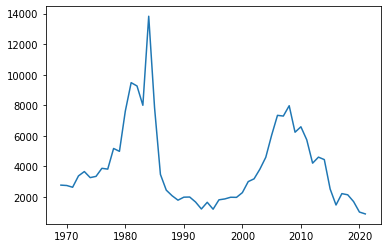

In [9]:
df.PERMIT_ISSUED_DATE.dt.year.value_counts().sort_index().plot()

<AxesSubplot:>

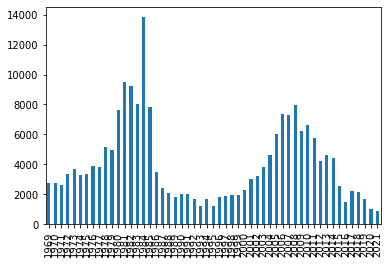

In [10]:
df.PERMIT_ISSUED_DATE.dt.year.value_counts().sort_index().plot(kind='bar')

## What's the difference between doing `.plot()` and `.plot(kind='bar')`? Which one do you feel is a better representation of the data?

In [11]:
# .plot() produces a line chart while .plot(kind='bar') produces a bar chart.
# I think the bar chart more clearly shows which year had the most permits issued.

### Bonus trick: axis labeling

**If you want to make your graphs look a little nicer, you can use some manual effort and make it happen!** In matplotlib, `.set_xticks` will show what tick marks to put on the bottom axis, and `set_xticklabels` will give them names. So for example, the code below will plot January, June and December on your graph.

```python
ax = df......plot()
ax.set_xticks([1, 6, 12])
ax.set_xticklabels(['Jan', 'June', 'Dec'])
```

Compare the results for `.plot()` vs `.plot(kind='bar')`. In theory the difference makes sense because bar plots are for categorical data, but speaking honestly: _matplotlib is a nightmare._

[Text(1, 0, 'Jan'), Text(6, 0, 'June'), Text(12, 0, 'Dec')]

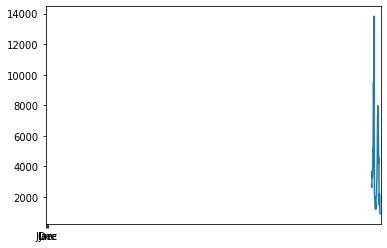

In [12]:
#hmmm neither of these charts look right
ax = df.PERMIT_ISSUED_DATE.dt.year.value_counts().sort_index().plot()
ax.set_xticks([1, 6, 12])
ax.set_xticklabels(['Jan', 'June', 'Dec'])

[Text(1, 0, 'Jan'), Text(6, 0, 'June'), Text(12, 0, 'Dec')]

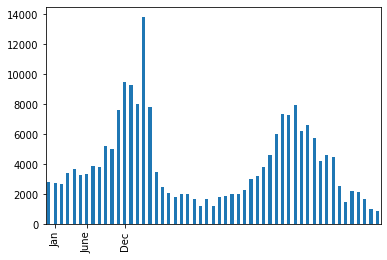

In [13]:
ax = df.PERMIT_ISSUED_DATE.dt.year.value_counts().sort_index().plot(kind='bar')
ax.set_xticks([1, 6, 12])
ax.set_xticklabels(['Jan', 'June', 'Dec'])

# Permits over time

## Graph permits issued by week (W), month (M) and quarter (Q)

Which is the best representation of the trend in issued permits?

<AxesSubplot:xlabel='PERMIT_ISSUED_DATE'>

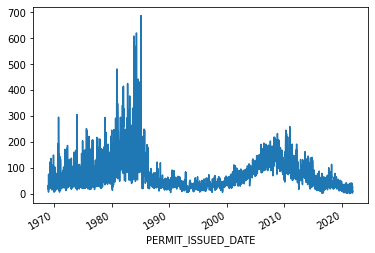

In [14]:
df.resample('W', on='PERMIT_ISSUED_DATE').size().sort_values().plot()

<AxesSubplot:xlabel='PERMIT_ISSUED_DATE'>

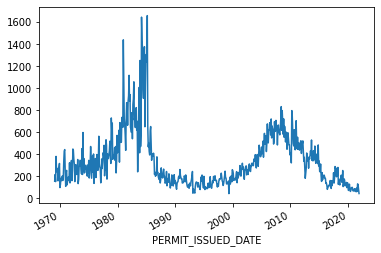

In [15]:
df.resample('M', on='PERMIT_ISSUED_DATE').size().sort_values().plot()

<AxesSubplot:xlabel='PERMIT_ISSUED_DATE'>

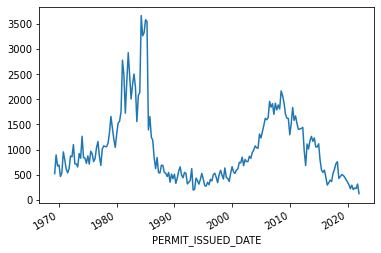

In [16]:
df.resample('Q', on='PERMIT_ISSUED_DATE').size().sort_values().plot()

## What month had the fewest permits issued?

In [17]:
df.PERMIT_ISSUED_DATE.dt.month.value_counts(ascending=True)

5     16445
4     16715
7     16771
6     16856
9     17317
1     17453
2     17686
3     18037
11    18291
10    18516
8     18990
12    19394
Name: PERMIT_ISSUED_DATE, dtype: int64

In [18]:
#If you're looking for the specific month
df.resample('M', on='PERMIT_ISSUED_DATE').size().sort_values()

PERMIT_ISSUED_DATE
1999-04-30      42
2021-11-30      43
1993-01-31      46
1993-05-31      47
1993-04-30      55
              ... 
1984-08-31    1376
1984-03-31    1427
1980-12-31    1438
1984-02-29    1644
1985-02-28    1658
Length: 635, dtype: int64

I'm going to tell you: **this is not a valid month to analyze.** Why not?

## What year had the most permits issued?

In [19]:
df.PERMIT_ISSUED_DATE.dt.year.value_counts()

1984    13827
1981     9483
1982     9266
1983     8003
2008     7974
1985     7839
1980     7618
2006     7345
2007     7299
2010     6597
2009     6241
2005     6045
2011     5745
1978     5178
1979     4991
2013     4612
2004     4602
2014     4451
2012     4217
1976     3881
2003     3830
1977     3828
1973     3669
1986     3483
1972     3384
1975     3354
1974     3272
2002     3193
2001     3011
1969     2781
1970     2756
1971     2642
2015     2525
1987     2452
2000     2290
2017     2225
2018     2149
1988     2085
1991     2003
1990     1993
1998     1988
1999     1981
1997     1878
1996     1820
1989     1797
2019     1705
1992     1677
1994     1658
2016     1482
1993     1221
1995     1207
2020     1020
2021      898
Name: PERMIT_ISSUED_DATE, dtype: int64

**Why so many in the early 80's?** There was money to be made! But [then it all came crashing down](https://en.wikipedia.org/wiki/1980s_oil_glut).

If we were historians or economists this dataset could be a lot more fun.

# Application Types

## What are the different application types?

There are three types of applications: new, renewals, and modifications. How many of each type are in this dataset?

In [20]:
df.APPLICATION_TYPE.value_counts()

NEW    202528
REN      8165
MOD      1778
Name: APPLICATION_TYPE, dtype: int64

## How many of each application type were granted in each month?

I don't know if we've ever done this! But think about it: 

1. You want to put them into groups based on their month. What's the `groupby` equivalent for time?
2. You want to count the number of applications types, just like you did in the cell above.

The result should look something like this:

```
PERMIT_ISSUED_DATE  APPLICATION_TYPE
2000-11-30          NEW                 157
                    REN                   7
2000-12-31          NEW                 194
                    REN                   8
2001-01-31          NEW                 228
                                       ... 
2021-10-31          MOD                  18
                    REN                   7
2021-11-30          NEW                  35
                    MOD                   6
                    REN                   2
```

In [21]:
df.resample('M', on='PERMIT_ISSUED_DATE').APPLICATION_TYPE.value_counts()

PERMIT_ISSUED_DATE  APPLICATION_TYPE
1969-01-31          NEW                 156
1969-02-28          NEW                 215
1969-03-31          NEW                 151
1969-04-30          NEW                 380
1969-05-31          NEW                 242
                                       ... 
2021-10-31          MOD                  18
                    REN                   7
2021-11-30          NEW                  35
                    MOD                   6
                    REN                   2
Name: APPLICATION_TYPE, Length: 1055, dtype: int64

### Converting into a dataframe

If we wanted to plot how new vs renewals vs modifications changed over time, we can't just do `.plot()`. I mean, try it, see what happens!

<AxesSubplot:xlabel='PERMIT_ISSUED_DATE,APPLICATION_TYPE'>

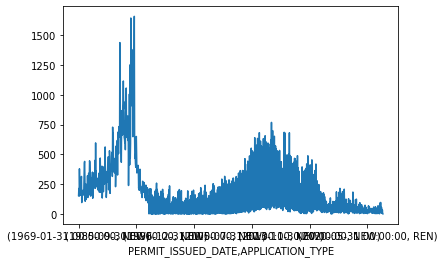

In [22]:
df.resample('M', on='PERMIT_ISSUED_DATE').APPLICATION_TYPE.value_counts().plot()

**It's awful.** But here's what you can do to switch the month-category groups into something nice: remove the `.plot()`, toss an `.unstack()` on the end, and you'll end up with something like this:

|APPLICATION_TYPE|MOD|NEW|REN|
|---|---|---|---|
|**PERMIT_ISSUED_DATE**|||||
|2000-11-30|NaN|157.0|7.0|
|2000-12-31|NaN|194.0|8.0|
|...|...|...|...|

In [23]:
df.resample('M', on='PERMIT_ISSUED_DATE').APPLICATION_TYPE.value_counts().unstack()

APPLICATION_TYPE,MOD,NEW,REN
PERMIT_ISSUED_DATE,,,
1969-01-31,NaN,156.0,NaN
1969-02-28,NaN,215.0,NaN
1969-03-31,NaN,151.0,NaN
1969-04-30,NaN,380.0,NaN
1969-05-31,NaN,242.0,NaN
...,...,...,...
2021-07-31,3.0,45.0,14.0
2021-08-31,17.0,92.0,22.0
2021-09-30,12.0,98.0,11.0


Nice, right? But even nicer: put a `.plot()` after it.

<AxesSubplot:xlabel='PERMIT_ISSUED_DATE'>

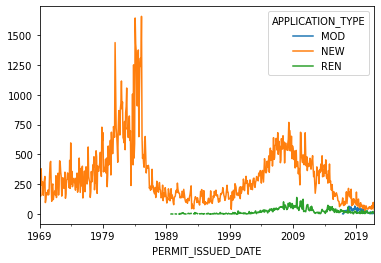

In [24]:
df.resample('M', on='PERMIT_ISSUED_DATE').APPLICATION_TYPE.value_counts().unstack().plot()

**Incredible!** This happens because it plots **each column as its own line.** Three columns, three lines!

The practice of moving your data around to get it into the format you want is called **reshaping**, and it's pretty common requirement when you're trying to get a particular kind of graph. You can [watch a YouTube video I made about the topic](https://www.youtube.com/watch?v=O4538i9MQEc) if you'd like to learn more.

## When was the first `MOD` permit issued?

They seem to not exist in the database initially, but showed up at some point later. How can we calculate this? There are a few different methods: some involving filtering, some involving groupby, some involving sorting, some involving `.min()`...

In [25]:
df[df.APPLICATION_TYPE.str.contains('MOD', na=False)].sort_values(by = 'PERMIT_ISSUED_DATE')

,REGION,COUNTY,MUNICIPALITY,PERMIT_ISSUED_DATE,OPERATOR,APPLICATION_TYPE,AUTH_TYPE_DESCRIPTION,WELL_API,UNCONVENTIONAL,CONFIGURATION,WELL_TYPE,FARM_NAME,SPUD_DATE,LATITUDE_DEGREES,LONGITUDE_DEGREES,LATITUDE_DECIMAL,LONGITUDE_DECIMAL,OGO_NUM,OPERATOR_ADDRESS,CITY,STATE,ZIP_CODE,AUTHORIZATION_ID,CLIENT_ID,PRMRY_FAC_ID
18228,EP DOGO NWDO Dstr Off,Butler,Oakland Twp,2016-11-04,PENNENERGY RESOURCES LLC,MOD,Drill & Operate Well Permit (Unconventional),019-22544,Yes,Horizontal Well,GAS,SHIELDS UNIT 3HB,06/03/2016,40º 55' 45.76'',-79º 48' 0.18'',40.929378,-79.800050,OGO-68305,1000 COMMERCE DR\nPARK PLACE ONE STE 400\n,PITTSBURGH,PA,15275-1011,1156128,294943,809764
141372,EP DOGO NCDO Dstr Off,Susquehanna,New Milford Twp,2016-11-15,SWN PROD CO LLC,MOD,Drill & Operate Well Permit (Unconventional),115-22200,Yes,Horizontal Well,GAS,WARNER 1H,09/16/2016,41º 49' 49.26'',-75º 40' 36.015'',41.830352,-75.676671,OGO-68698,PO BOX 12359\n,SPRING,TX,77391-2359,1154895,316622,811390
20188,EP DOGO NCDO Dstr Off,Cameron,Shippen Twp,2016-11-23,SENECA RESOURCES CO LLC,MOD,Drill & Operate Well Permit (Unconventional),023-20229,Yes,Horizontal Well,GAS,SRC WT 2353 214HU 52620,10/28/2016,41º 35' 13.54'',-78º 22' 29.85'',41.587094,-78.374958,OGO-15547,51 ZENTS BLVD\n,BROOKVILLE,PA,15825-2701,1157048,72933,812688
18230,EP DOGO NWDO Dstr Off,Butler,Oakland Twp,2016-12-20,PENNENERGY RESOURCES LLC,MOD,Drill & Operate Well Permit (Unconventional),019-22561,Yes,Horizontal Well,GAS,SHIELDS UNIT 7H,07/09/2016,40º 55' 45.47'',-79º 47' 59.91'',40.929297,-79.799975,OGO-68305,1000 COMMERCE DR\nPARK PLACE ONE STE 400\n,PITTSBURGH,PA,15275-1011,1158830,294943,811175
142922,EP DOGO NCDO Dstr Off,Tioga,Duncan Twp,2017-01-13,DIVERSIFIED PROD LLC,MOD,Drill & Operate Well Permit (Unconventional),117-21787,Yes,Horizontal Well,GAS,PHOENIX 593850,01/09/2017,41º 38' 44.4'',-77º 15' 22.11'',41.645667,-77.256142,OGO-65675,4150 BELDEN VILLAGE ST NW STE 410\n,CANTON,OH,44718-2553,1157719,244896,802427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198319,EP DOGO SWDO Dstr Off,Washington,Donegal Twp,2021-11-10,COLUMBIA GAS TRANS LLC,MOD,Drill & Operate Well Permit Redrill (Conventio...,125-20087,No,Vertical Well,STORAGE WELL,W T WOODS L541,01/01/1800,40º 9' 2.437'',-80º 26' 33.356'',40.150677,-80.442599,OGO-2017,PO BOX 1273\n1700 MACCORKLE AVE SE\n,CHARLESTON,WV,25325-1273,1373426,29248,232461
139753,EP DOGO NCDO Dstr Off,Susquehanna,Forest Lake Twp,2021-11-15,COTERRA ENERGY INC,MOD,Drill & Operate Well Permit (Unconventional),115-22695,Yes,Horizontal Well,GAS,BENNER J 012,NaN,41º 50' 59.74'',-75º 59' 48.192'',41.849930,-75.996720,OGO-10897,2000 PARK LN STE 300\n,PITTSBURGH,PA,15275-1121,1374032,43513,837302
25073,EP DOGO NWDO Dstr Off,Clarion,Perry Twp,2021-11-15,LAUREL MOUNTAIN PRODUCTION,MOD,Drill & Operate Well Permit (Unconventional),031-25700,Yes,Horizontal Well,GAS,WINDY OAKLAND 11H,01/03/2020,41º 7' 29.67'',-79º 38' 52.332'',41.124910,-79.647870,OGO-68699,61 MCMURRAY RD STE 300\n,PITTSBURGH,PA,15241-1633,1371288,316802,824833
25074,EP DOGO NWDO Dstr Off,Clarion,Perry Twp,2021-11-15,LAUREL MOUNTAIN PRODUCTION,MOD,Drill & Operate Well Permit (Unconventional),031-25698,Yes,Horizontal Well,GAS,WINDY OAKLAND 5H,01/03/2020,41º 7' 29.60'',-79º 38' 51.972'',41.124890,-79.647770,OGO-68699,61 MCMURRAY RD STE 300\n,PITTSBURGH,PA,15241-1633,1371294,316802,824183


## What are the top five counties for granting new permits?

In [26]:
df.COUNTY.value_counts()

McKean            33074
Warren            26192
Venango           25169
Indiana           14878
Forest            10864
Armstrong          9478
Westmoreland       9216
Clearfield         7006
Jefferson          6592
Washington         6476
Greene             5855
Crawford           5658
Clarion            5553
Elk                5092
Erie               5090
Fayette            5084
Mercer             4811
Bradford           4359
Susquehanna        3524
Tioga              2615
Lycoming           2402
Butler             2341
Potter             1795
Allegheny          1783
Centre             1686
Clinton            1333
Cambria            1203
Beaver              717
Wyoming             716
Lawrence            551
Sullivan            521
Cameron             313
Somerset            287
Bedford              62
Lackawanna           47
Wayne                34
Luzerne              20
Huntingdon           19
Columbia             18
Blair                15
Chester               5
Bucks           

## Create a new dataframe called new_top5 that is only new applications from those five counties

In [27]:
top5 = ['McKean', 'Warren', 'Venango', 'Indiana', 'Forest']

In [28]:
new_top5 = df[(df.APPLICATION_TYPE == 'NEW') & (df.COUNTY.isin(top5))]

In [29]:
new_top5

,REGION,COUNTY,MUNICIPALITY,PERMIT_ISSUED_DATE,OPERATOR,APPLICATION_TYPE,AUTH_TYPE_DESCRIPTION,WELL_API,UNCONVENTIONAL,CONFIGURATION,WELL_TYPE,FARM_NAME,SPUD_DATE,LATITUDE_DEGREES,LONGITUDE_DEGREES,LATITUDE_DECIMAL,LONGITUDE_DECIMAL,OGO_NUM,OPERATOR_ADDRESS,CITY,STATE,ZIP_CODE,AUTHORIZATION_ID,CLIENT_ID,PRMRY_FAC_ID
56801,EP DOGO NWDO Dstr Off,Forest,Barnett Twp,1984-11-28,ANTHONY E COOK OIL & GAS PROD CO,NEW,Drill & Operate Well Permit Drill Deeper,053-23648,No,Vertical Well,GAS,COOK 1,01/01/1800,41º 19' 38.97'',-79º 11' 45.963'',41.327492,-79.196101,OGO-2281,PO BOX 118\n,COOKSBURG,PA,16217-0118,107175,39665,109964
56802,EP DOGO NWDO Dstr Off,Forest,Barnett Twp,1975-10-29,CHERNICKY PETE,NEW,Drill & Operate Well Permit Redrill,053-21374,No,Vertical Well,GAS,PETE CHERNICKY 1,01/01/1800,NaN,NaN,NaN,NaN,OGO-1663,PO BOX 69\n,CLARION,PA,16214-0069,104032,45859,45687
56803,EP DOGO NWDO Dstr Off,Forest,Barnett Twp,1976-02-11,CHERNICKY PETE,NEW,Drill & Operate Well Permit,053-21478,No,Vertical Well,GAS,PETE CHERNICKY 2,01/01/1800,41º 21' 15.19'',-79º 12' 10.864'',41.354220,-79.203018,OGO-1663,PO BOX 69\n,CLARION,PA,16214-0069,104143,45859,45791
56804,EP DOGO NWDO Dstr Off,Forest,Barnett Twp,1973-11-30,DILLON & REETZ,NEW,Drill & Operate Well Permit,053-20988,No,Vertical Well,OIL,WARRANT 3159 4,NaN,NaN,NaN,NaN,NaN,OGO-3607,PO BOX 307\n,BRONXVILLE,NY,10708-0307,103517,47618,45301
56805,EP DOGO NWDO Dstr Off,Forest,Barnett Twp,1973-11-30,DILLON & REETZ,NEW,Drill & Operate Well Permit,053-20989,No,Vertical Well,OIL,WARRANT 3159 5,NaN,NaN,NaN,NaN,NaN,OGO-3607,PO BOX 307\n,BRONXVILLE,NY,10708-0307,103518,47618,45302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196024,EP DOGO NWDO Dstr Off,Warren,Youngsville Boro,1983-11-09,UNIVERSAL RESOURCES HOLDINGS INC,NEW,Drill & Operate Well Permit,123-34108,No,Vertical Well,OIL,HILL A 5,NaN,NaN,NaN,NaN,NaN,OGO-19567,3152 E MAIN RD\n,DUNKIRK,NY,14048-9735,246208,28100,222780
196025,EP DOGO NWDO Dstr Off,Warren,Youngsville Boro,1983-11-09,UNIVERSAL RESOURCES HOLDINGS INC,NEW,Drill & Operate Well Permit,123-34109,No,Vertical Well,OIL,HILL A 6,NaN,NaN,NaN,NaN,NaN,OGO-19567,3152 E MAIN RD\n,DUNKIRK,NY,14048-9735,246209,28100,222781
196026,EP DOGO NWDO Dstr Off,Warren,Youngsville Boro,2007-05-02,UNIVERSAL RESOURCES HOLDINGS INC,NEW,Drill & Operate Well Permit,123-44908,No,Vertical Well,GAS,HILL LEASE 31,07/17/2007,41º 50' 51.24'',-79º 18' 56.4'',41.847567,-79.315667,OGO-19567,3152 E MAIN RD\n,DUNKIRK,NY,14048-9735,674628,28100,691894
196027,EP DOGO NWDO Dstr Off,Warren,Youngsville Boro,2015-02-12,UNIVERSAL RESOURCES HOLDINGS INC,NEW,Drill & Operate Well Permit,123-47810,No,Vertical Well,OIL,HILL LEASE 27,07/07/2015,41º 50' 50.5'',-79º 19' 12.83'',41.847361,-79.320231,OGO-19567,3152 E MAIN RD\n,DUNKIRK,NY,14048-9735,1058771,28100,782964


### Confirm your new dataframe has 80667 rows

In [30]:
new_top5.shape

(107786, 25)

## Plot the number of permits each year. Each county should have its own line.

It should look like this:

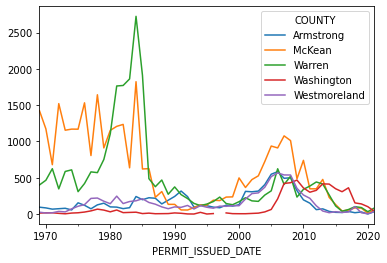

You'll want to do roughly the same thing you did for applications up above:

1. Put them in groups based on their year
2. See how many times each county exists for that year
3. `.unstack().plot()`

Before you plot, you should have a dataframe where **years are rows and counties are columns.** If you have a bazillion lines it's because you're using your original dataframe instead of the new top 5 one.

<AxesSubplot:xlabel='PERMIT_ISSUED_DATE'>

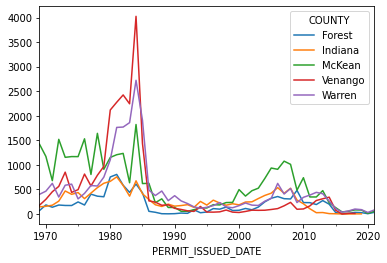

In [31]:
new_top5.resample('Y', on='PERMIT_ISSUED_DATE').COUNTY.value_counts().unstack().plot()

## The mid-80s hit Warren County especially hard! What was the percentage drop in new permits 1985 and 1986?

### Step one: Calculating

For the code, just put `.pct_change()` on your county-vs-date dataframe, it'll calculate the percentage change between the columns of each row and the row below it. It shoudl look like this:

|COUNTY|Armstrong|McKean|Warren|Washington|Westmoreland|
|---|---|---|---|---|---|
|**PERMIT_ISSUED_DATE**|||||
|1969-12-31|NaN	|NaN|NaN|NaN|NaN|
|1970-12-31|-0.105263|-0.176264|0.162095|0.214286|-0.423077|
|1971-12-31|-0.200000|-0.420290|0.341202|0.058824|0.200000|

In [32]:
new_top5.resample('Y', on='PERMIT_ISSUED_DATE').COUNTY.value_counts().unstack().pct_change()

COUNTY,Forest,Indiana,McKean,Venango,Warren
PERMIT_ISSUED_DATE,,,,,
1969-12-31,NaN,NaN,NaN,NaN,NaN
1970-12-31,1.657143,0.082192,-0.176264,0.675978,0.162095
1971-12-31,-0.252688,0.139241,-0.420290,0.513333,0.341202
1972-12-31,0.323741,0.461111,1.236765,0.240088,-0.444800
1973-12-31,-0.048913,0.787072,-0.240631,0.515098,0.691643
1974-12-31,-0.005714,-0.144681,0.012987,-0.483001,0.037479
1975-12-31,0.419540,0.089552,-0.000855,0.126984,-0.492611
1976-12-31,-0.255061,-0.283105,0.310522,0.637827,0.362460
1977-12-31,1.201087,0.359873,-0.473890,-0.296069,0.380048


### Step two: Writing

But can you turn it into a sentence? Something like...

> after an increase in permits of [blank] percent just two years prior, 1986 saw Warren's new permits plummet a staggering [blank] percent

In [33]:
#After an increase in permits of 46 percent just two years prior, 1986 saw Warren's new permits plummet a staggering 74 percent.
warren = df[df.COUNTY == 'Warren']
warren

,REGION,COUNTY,MUNICIPALITY,PERMIT_ISSUED_DATE,OPERATOR,APPLICATION_TYPE,AUTH_TYPE_DESCRIPTION,WELL_API,UNCONVENTIONAL,CONFIGURATION,WELL_TYPE,FARM_NAME,SPUD_DATE,LATITUDE_DEGREES,LONGITUDE_DEGREES,LATITUDE_DECIMAL,LONGITUDE_DECIMAL,OGO_NUM,OPERATOR_ADDRESS,CITY,STATE,ZIP_CODE,AUTHORIZATION_ID,CLIENT_ID,PRMRY_FAC_ID
169837,EP DOGO NWDO Dstr Off,Warren,Bear Lake Boro,1984-09-12,BEAR LAKE ENERGY,NEW,Drill & Operate Well Permit,123-39218,No,Vertical Well,GAS,L. CROSBY 1,10/02/1984,41º 59' 26.40'',-79º 29' 56.058'',41.990667,-79.498905,OGO-67220,14452 ROUTE 57\n,SUGAR GROVE,PA,16350-2104,252833,273726,227892
169838,EP DOGO NWDO Dstr Off,Warren,Bear Lake Boro,1984-09-11,PAN ENERGY CO INC,NEW,Drill & Operate Well Permit,123-39212,No,Vertical Well,GAS,SUSAN WEBSTER 1,12/23/1984,41º 59' 47.01'',-79º 30' 4.43'',41.996392,-79.501231,OGO-45440,7311 MILESTRIP RD\n,ORCHARD PARK,NY,14127-1410,252826,48285,227886
169839,EP DOGO NWDO Dstr Off,Warren,Bear Lake Boro,2006-11-22,R JOSEPH & SHELBY J MANEY,NEW,Drill & Operate Well Permit,123-44638,No,Vertical Well,OIL,MANEY 9,11/10/2008,41º 51' 6.11'',-79º 9' 49.3'',41.851697,-79.163694,OGO-65925,760 BEECH ST\n,WARREN,PA,16365-3670,652520,252106,686718
169840,EP DOGO NWDO Dstr Off,Warren,Bear Lake Boro,2007-11-15,R JOSEPH & SHELBY J MANEY,REN,Drill & Operate Well Permit,123-44638,No,Vertical Well,OIL,MANEY 9,11/10/2008,41º 51' 6.11'',-79º 9' 49.3'',41.851697,-79.163694,OGO-65925,760 BEECH ST\n,WARREN,PA,16365-3670,701501,252106,686718
169841,EP DOGO NWDO Dstr Off,Warren,Brokenstraw Twp,1969-02-06,A & D OIL CO,NEW,Drill & Operate Well Permit,123-22002,No,Vertical Well,UNDETERMINED,ARTHUR K WICKHAM A & D3,NaN,NaN,NaN,NaN,NaN,OGO-19,15064 ROUTE 6\n,CLARENDON,PA,16313-4122,230427,46063,210773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196024,EP DOGO NWDO Dstr Off,Warren,Youngsville Boro,1983-11-09,UNIVERSAL RESOURCES HOLDINGS INC,NEW,Drill & Operate Well Permit,123-34108,No,Vertical Well,OIL,HILL A 5,NaN,NaN,NaN,NaN,NaN,OGO-19567,3152 E MAIN RD\n,DUNKIRK,NY,14048-9735,246208,28100,222780
196025,EP DOGO NWDO Dstr Off,Warren,Youngsville Boro,1983-11-09,UNIVERSAL RESOURCES HOLDINGS INC,NEW,Drill & Operate Well Permit,123-34109,No,Vertical Well,OIL,HILL A 6,NaN,NaN,NaN,NaN,NaN,OGO-19567,3152 E MAIN RD\n,DUNKIRK,NY,14048-9735,246209,28100,222781
196026,EP DOGO NWDO Dstr Off,Warren,Youngsville Boro,2007-05-02,UNIVERSAL RESOURCES HOLDINGS INC,NEW,Drill & Operate Well Permit,123-44908,No,Vertical Well,GAS,HILL LEASE 31,07/17/2007,41º 50' 51.24'',-79º 18' 56.4'',41.847567,-79.315667,OGO-19567,3152 E MAIN RD\n,DUNKIRK,NY,14048-9735,674628,28100,691894
196027,EP DOGO NWDO Dstr Off,Warren,Youngsville Boro,2015-02-12,UNIVERSAL RESOURCES HOLDINGS INC,NEW,Drill & Operate Well Permit,123-47810,No,Vertical Well,OIL,HILL LEASE 27,07/07/2015,41º 50' 50.5'',-79º 19' 12.83'',41.847361,-79.320231,OGO-19567,3152 E MAIN RD\n,DUNKIRK,NY,14048-9735,1058771,28100,782964


In [34]:
warren.resample('Y', on='PERMIT_ISSUED_DATE').COUNTY.value_counts().unstack().pct_change()

COUNTY,Warren
PERMIT_ISSUED_DATE,
1969-12-31,NaN
1970-12-31,0.162095
1971-12-31,0.341202
1972-12-31,-0.444800
1973-12-31,0.691643
1974-12-31,0.037479
1975-12-31,-0.492611
1976-12-31,0.362460
1977-12-31,0.380048


In [35]:
warren.resample('Y', on='PERMIT_ISSUED_DATE').COUNTY.value_counts().unstack()

COUNTY,Warren
PERMIT_ISSUED_DATE,
1969-12-31,401
1970-12-31,466
1971-12-31,625
1972-12-31,347
1973-12-31,587
1974-12-31,609
1975-12-31,309
1976-12-31,421
1977-12-31,581


# Now let's relax a little bit

## Does the government issue permits on the weekends?

To answer this question, calculate the percent of permits are issued on Saturday and Sunday. We know how to get the month and the year and the day of the month from a datetime, but how do you get the day of the week..?

In [36]:
df.PERMIT_ISSUED_DATE.dt.strftime('%A').value_counts()

Wednesday    45685
Tuesday      43735
Thursday     42451
Friday       40382
Monday       38385
Saturday      1203
Sunday         630
Name: PERMIT_ISSUED_DATE, dtype: int64